# ML with R
## Download Data

In [1]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

# list types for each attribute
sapply(dataset, class)
dim(dataset)
head(dataset)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

[1] 150   5

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


## Create Data Partition

In [2]:
library(lattice)
library(ggplot2)
library(caret)
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

cat(
    "validation_index: ",length(validation_index),"\n",
    "validation: ",dim(validation)[1]
)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


validation_index:  120 
 validation:  30

In [3]:
# list the levels for the class
levels(dataset$Species)

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

In [4]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
Iris-setosa,40,33.33333
Iris-versicolor,40,33.33333
Iris-virginica,40,33.33333


In [5]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.300  
 Median :5.750   Median :3.000   Median :4.250   Median :1.300  
 Mean   :5.809   Mean   :3.042   Mean   :3.723   Mean   :1.193  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
                     
                     
                     

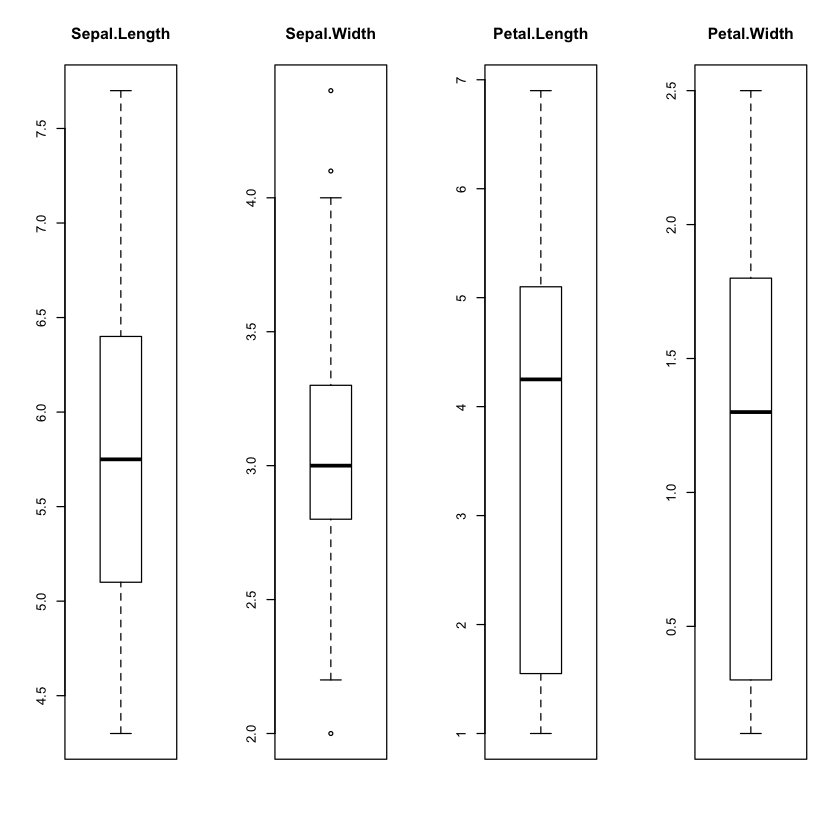

In [6]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

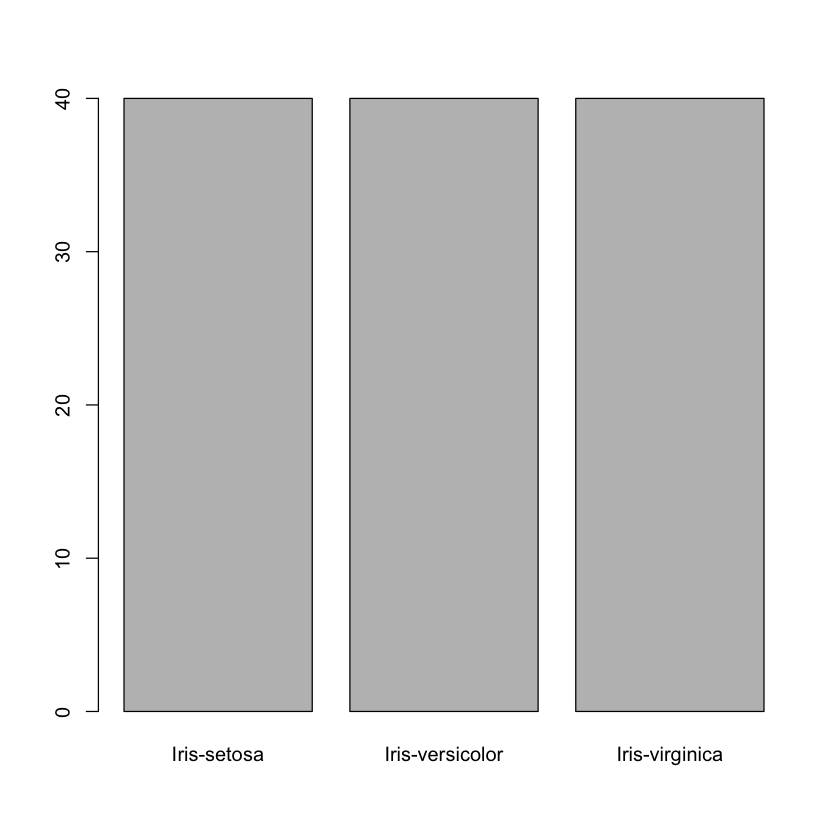

In [7]:
# barplot for class breakdown
plot(y)

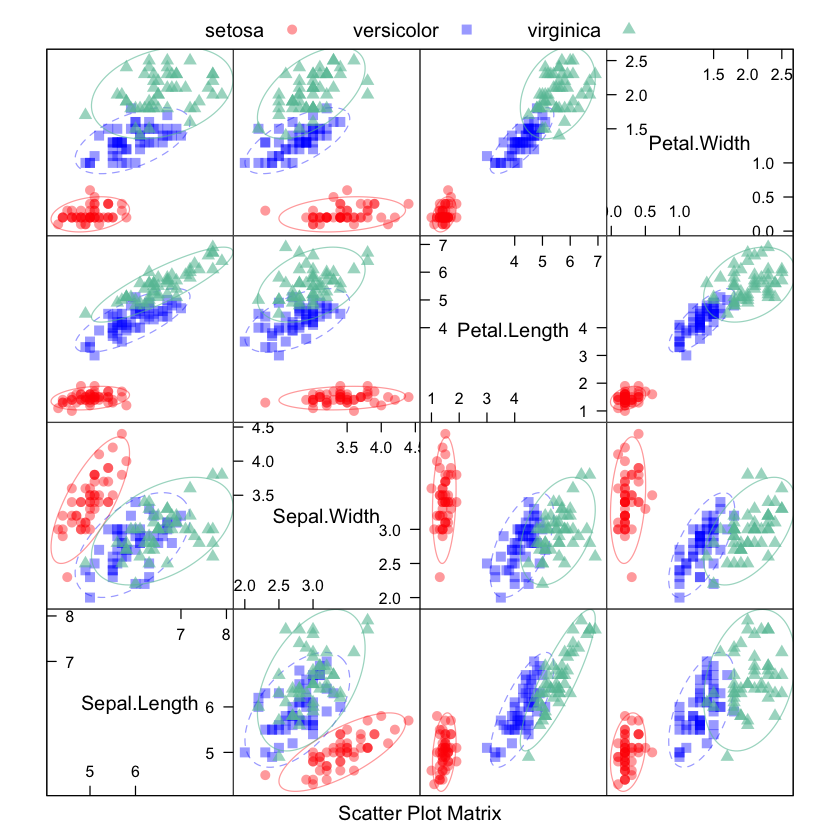

In [16]:
library(ellipse)
library(AppliedPredictiveModeling)
transparentTheme(trans = .4)
featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "ellipse",
            ## Add a key at the top
            auto.key = list(columns = 3))

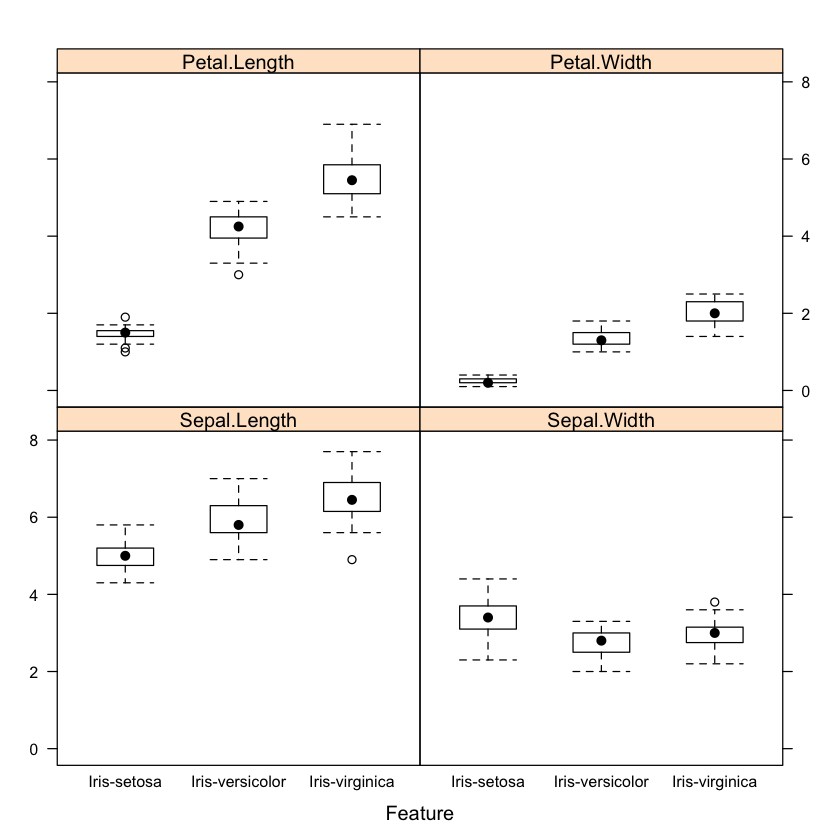

In [17]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

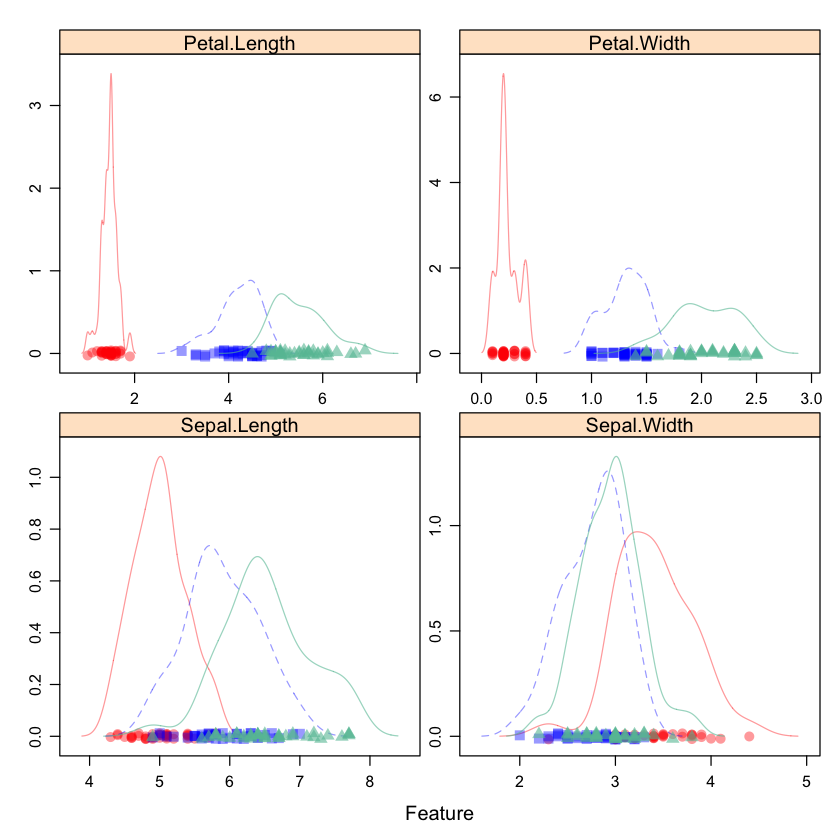

In [18]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

## Find the ML Model
### Split in dataset in 10 

In [19]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

### Create differente models

In [22]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

### Test Models

In [23]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333       1    1    0
cart 0.8333333 0.9166667 0.9166667 0.9333333       1    1    0
knn  0.9166667 0.9375000 1.0000000 0.9750000       1    1    0
svm  0.7500000 0.9166667 1.0000000 0.9416667       1    1    0
rf   0.9166667 0.9166667 1.0000000 0.9666667       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 1.00000  1.000 0.9750       1    1    0
cart 0.750 0.87500  0.875 0.9000       1    1    0
knn  0.875 0.90625  1.000 0.9625       1    1    0
svm  0.625 0.87500  1.000 0.9125       1    1    0
rf   0.875 0.87500  1.000 0.9500       1    1    0


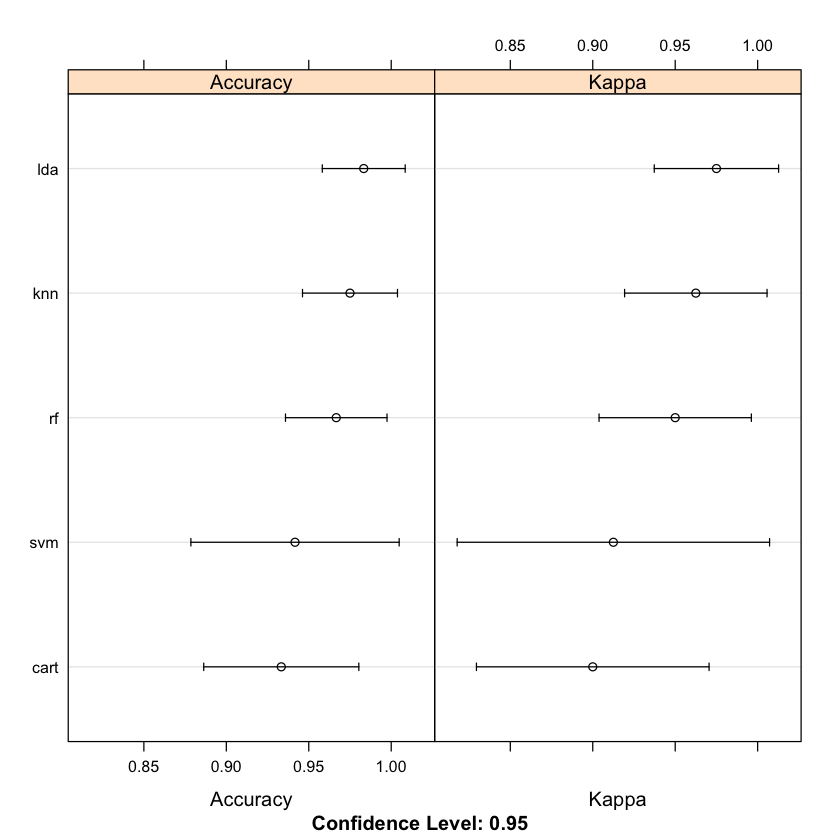

In [24]:
# compare accuracy of models
dotplot(results)

## Linear Discriminant Analysis
Best Accurancy model here: LDA

In [25]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



In [26]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0               9              0
  Iris-virginica            0               1             10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 0.9000
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred Value